In [13]:
import numpy as np                             #Import numpy so that we can actually do maths ...
import matplotlib.pyplot as plt                 #and make pretty plots.

InitVal = np.array([[-20],[10],[4],[-3]])      #Specify the 'true' initial values of the quantity we are estimating. 

Dt = 2

A = np.eye(4)
A[0,2] = Dt
A[1,3] = Dt

X0 = np.array([[-15],[0],[0],[0]])             #Specify an initial estimate ...
P0 = np.diag([15,10,10,10])                     #and an estimated variance of our initial estimate.

H = np.array([[1,0,0,0],[0,1,0,0]])

MeasErr = np.diag([10,5])                  #Specify an estimated error in the measurements.
                                                #This will be used as the variance of the measurements' distribution. 

N = 10                                         #Specify a number of iterations to perform.

In [14]:
Estim = np.zeros((4,N+1))           #Initialise arrays to record the estimated and 'measured' values.
Measu = np.zeros((2,N))
Trace = np.zeros((1,N+1))
Sigma = np.zeros((1,N+1))

i = 0                               #Start an iteration counter.
Estim.T[0] = X0.T                   #Write the initial estimate into the record.
Trace.T[0] = np.trace(P0)
Sigma.T[0] = P0[0,0] + P0[1,1]

TrueVal = A@InitVal

X = X0                              #X -- State matrix
P = P0                              #P -- State covariance matrix
R = MeasErr                         #R -- Measurement covariance matrix

while i < N:
    Xp = A@X                        #Xp -- Predicted state
    Pp = A@P@A.T                    #Pp -- Predicted state covariance
    
    Y = np.array([np.random.multivariate_normal((np.array([TrueVal[0],TrueVal[1]]).T)[0],R)]).T
    Measu.T[i] = Y.T                          #Y -- 'Measured' value
    
    K = Pp@H.T@np.linalg.inv(H@Pp@H.T + R)    #K -- Kalman gain
    
    X = Xp + K@(Y - H@Xp)           #Update X and P
    P = (np.eye(4) - K@H)@Pp
    i = i+1                         #Increment the iteration counter,
    Estim.T[i] = X.T                #and write the new estimated values to the record.
    Trace.T[i] = np.trace(P)
    Sigma.T[i] = P[0,0] + P[1,1]
    TrueVal = A@TrueVal

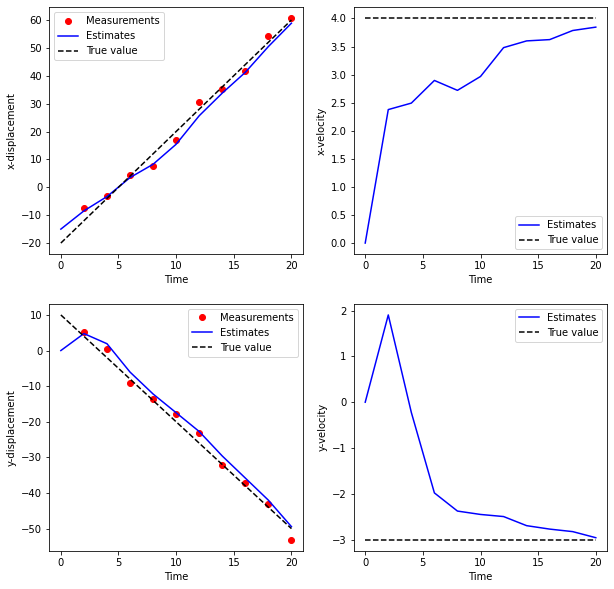

In [15]:
xt = np.arange(N+1)*Dt
xxt = (np.arange(N)+1)*Dt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.plot(xxt, Measu[0],'ro',label='Measurements')
ax1.plot(xt, Estim[0],'b',label='Estimates')
ax1.plot(xt, InitVal[0]*np.ones(N+1) + xt*InitVal[2],'k--',label='True value')
ax1.set_xlabel('Time')
ax1.set_ylabel('x-displacement')
ax1.legend()

ax2.plot(xt, Estim[2],'b',label='Estimates')
ax2.plot(xt, TrueVal[2]*np.ones(N+1),'k--',label='True value')
ax2.set_xlabel('Time')
ax2.set_ylabel('x-velocity')
ax2.legend()

ax3.plot(xxt, Measu[1],'ro',label='Measurements')
ax3.plot(xt, Estim[1],'b',label='Estimates')
ax3.plot(xt, InitVal[1]*np.ones(N+1) + xt*InitVal[3],'k--',label='True value')
ax3.set_xlabel('Time')
ax3.set_ylabel('y-displacement')
ax3.legend()

ax4.plot(xt, Estim[3],'b',label='Estimates')
ax4.plot(xt, TrueVal[3]*np.ones(N+1),'k--',label='True value')
ax4.set_xlabel('Time')
ax4.set_ylabel('y-velocity')
ax4.legend()

Text(0, 0.5, '$\\sigma^2_{x} + \\sigma^2_{y}$')

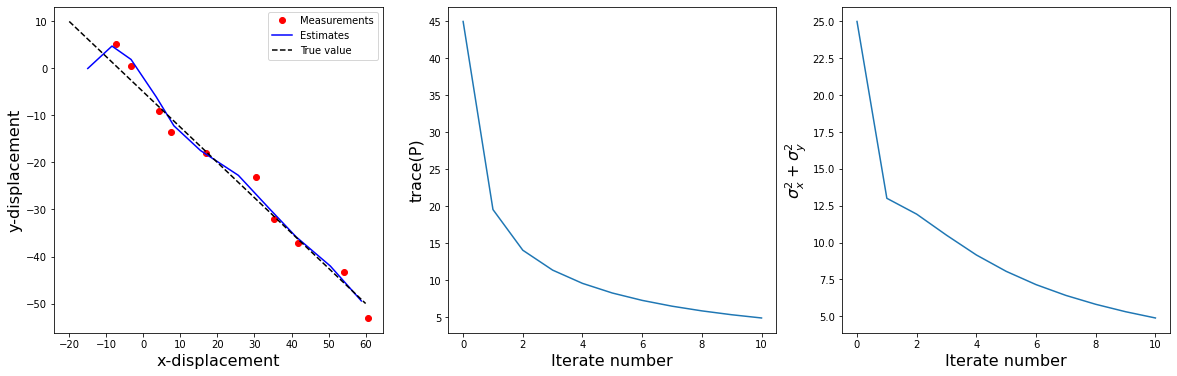

In [16]:
xt = np.arange(N+1)*Dt

fig, (ax1 , ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

ax1.plot(Measu[0], Measu[1],'ro',label='Measurements')
ax1.plot(Estim[0], Estim[1],'b',label='Estimates')
ax1.plot(InitVal[0]*np.ones(N+1) + xt*InitVal[2], InitVal[1]*np.ones(N+1) + xt*InitVal[3],'k--',label='True value')
ax1.set_xlabel('x-displacement', fontsize=16)
ax1.set_ylabel('y-displacement', fontsize=16)
ax1.legend()

ax2.plot(np.arange(N+1), Trace.T)
ax2.set_xlabel('Iterate number', fontsize=16)
ax2.set_ylabel('trace(P)', fontsize=16)

ax3.plot(np.arange(N+1), Sigma.T)
ax3.set_xlabel('Iterate number', fontsize=16)
ax3.set_ylabel('$\sigma^2_{x} + \sigma^2_{y}$', fontsize=16)